In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Urban_Sound/metadata/UrbanSound8K.csv")
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [ ]:
audio_path = "/content/drive/MyDrive/Urban_Sound/audio/"
df['file_path'] = audio_path + 'fold' + df.fold.astype(str) + '/' + df['slice_file_name']

df['time'] = df['end'] - df['start']
df.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class,file_path,time
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark,/content/drive/MyDrive/Urban_Sound/audio/fold5...,0.317551
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing,/content/drive/MyDrive/Urban_Sound/audio/fold5...,4.000000
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing,/content/drive/MyDrive/Urban_Sound/audio/fold5...,4.000000
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing,/content/drive/MyDrive/Urban_Sound/audio/fold5...,4.000000
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing,/content/drive/MyDrive/Urban_Sound/audio/fold5...,4.000000
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing,/content/drive/MyDrive/Urban_Sound/audio/fold5...,4.000000
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing,/content/drive/MyDrive/Urban_Sound/audio/fold5...,4.000000
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing,/content/drive/MyDrive/Urban_Sound/audio/fold5...,4.000000
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing,/content/drive/MyDrive/Urban_Sound/audio/fold5...,4.000000
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn,/content/drive/MyDrive/Urban_Sound/audio/fold1...,0.648525


In [ ]:
df.describe()

,fsID,start,end,salience,fold,classID,time
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877,3.607904
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544,0.973570
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000,0.054517
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000,4.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000,4.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
 8   file_path        8732 non-null   object 
 9   time             8732 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 682.3+ KB


In [ ]:
df.isnull().sum()

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
file_path          0
time               0
dtype: int64

In [ ]:
df['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

# Visualization

In [ ]:
ordered_class = df.groupby('class').count().sort_values(by='class').index

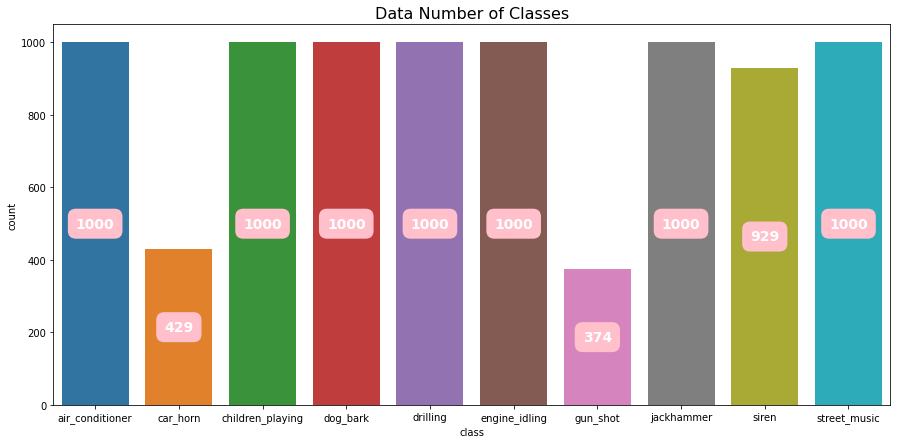

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = sns.countplot(data = df, x = 'class', order = ordered_class)

for i in ax.patches:    
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = int(i.get_height()), 
            ha = 'center', va='center', size = 14, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="round,pad=0.5", fc='pink', ec="pink", lw=2))

plt.title('Number of Samples of Each Class',fontsize=16)
plt.show()

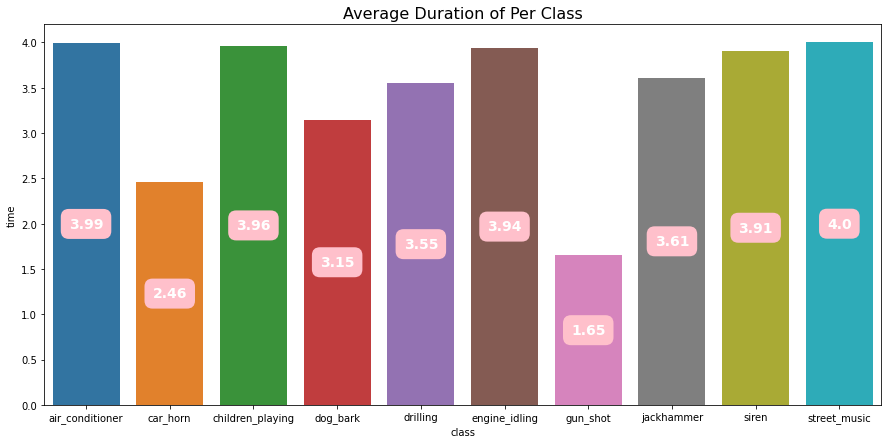

In [ ]:
df_temp = df.groupby('class')['time'].mean().reset_index()
fig = plt.figure(figsize=(15, 7))

ax = sns.barplot(x=df_temp['class'], y=df_temp['time'], 
                 data = df, order = ordered_class)

for i in ax.patches:    
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = f"{round(i.get_height(),2)}", 
            ha = 'center', va='center', size = 14, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="round,pad=0.5", fc='pink', ec="pink", lw=2))

plt.title('Average Duration of Per Class',fontsize=16)
plt.show()

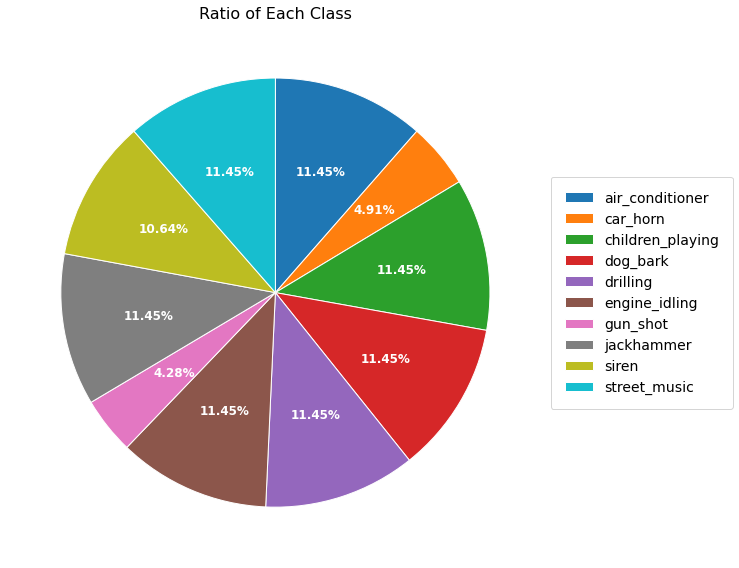

In [ ]:
df_temp = df.groupby('class')['classID'].count().reset_index()

plt.figure(figsize=(20, 8))

patches, texts, autotexts = plt.pie(df_temp['classID'], 
                                    wedgeprops = {'linewidth' : 1, 
                                                  'edgecolor' : 'white' },
                                    autopct = '%.2f%%', 
                                    labeldistance = 1.07,
                                    counterclock=False,
                                    startangle=-270)
plt.legend(df_temp['class'], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), borderpad=1, fontsize=14)

plt.setp(autotexts, **{'color':'white', 'weight':'bold', 'fontsize':12})
plt.title('Ratio of Each Class',fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
df_temp = df.groupby('class').sample().reset_index()

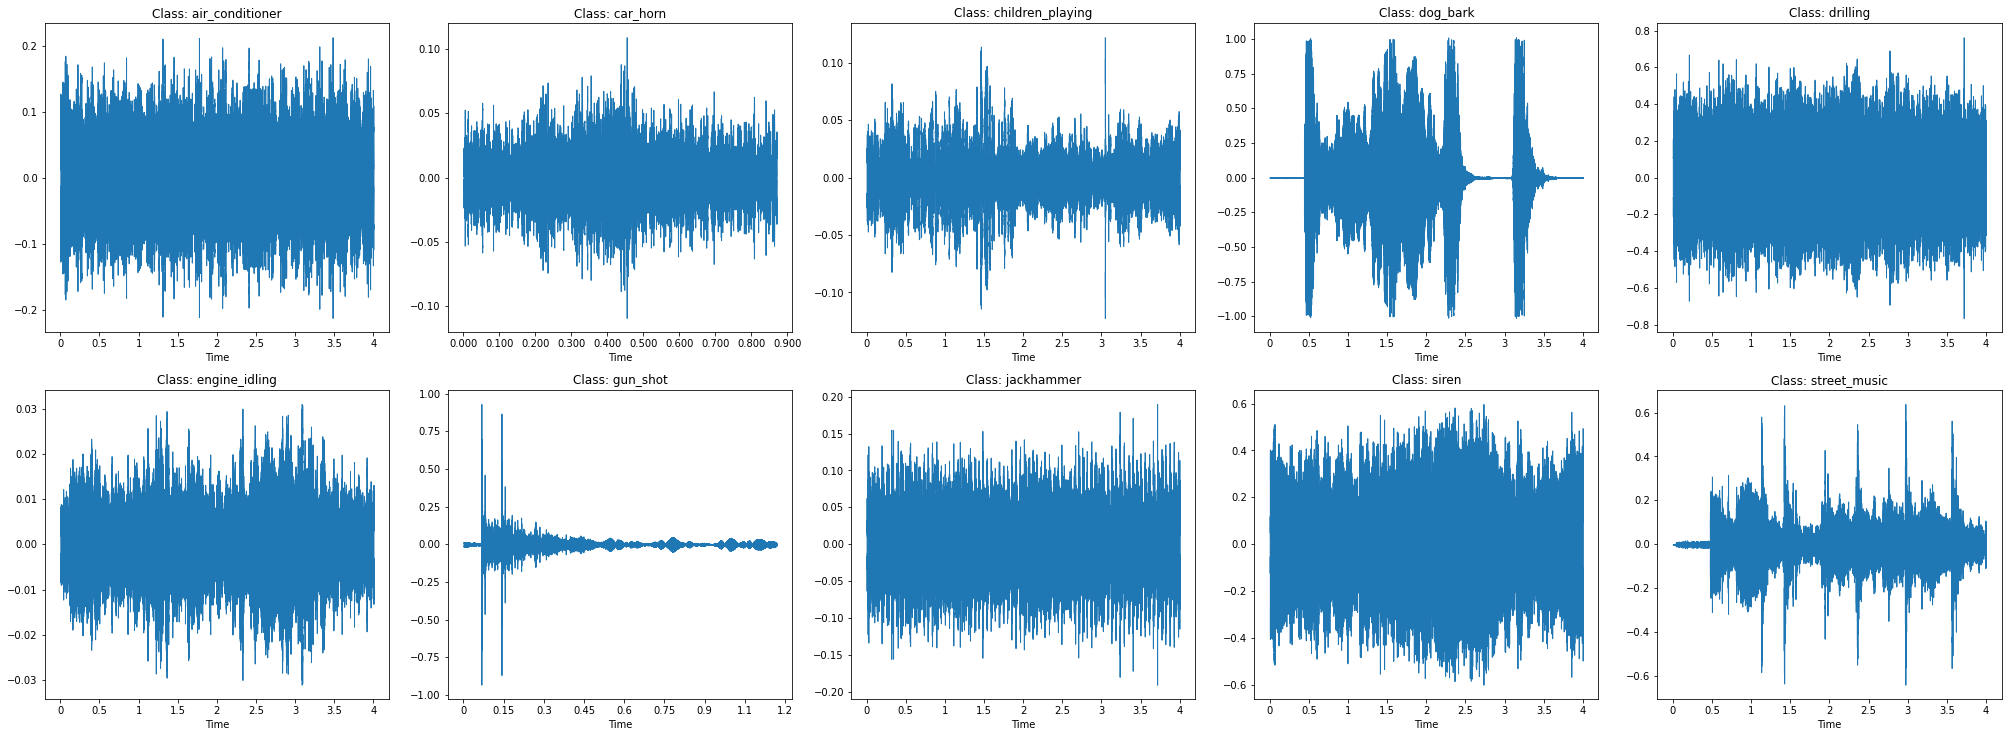

In [ ]:
fig = plt.figure(figsize=(28, 15))

for i in range(len(df_temp)):
  #print(df_temp['file_path'][i])
  x, sr = librosa.load(df_temp['file_path'][i])
  plt.subplot(3,5,i+1)
  plt.title('Class: '+str(df_temp['class'][i]))
  librosa.display.waveshow(x, sr=sr)

plt.tight_layout()

In [ ]:
# fig = plt.figure(figsize=(25, 15))
# for i in range(10):
#   x, sr = librosa.load(df["file_path"][i])
#   plt.subplot(3,5,i+1)
#   plt.title('Class: '+str(df['class'][i]))
#   librosa.display.waveshow(x, sr=sr)

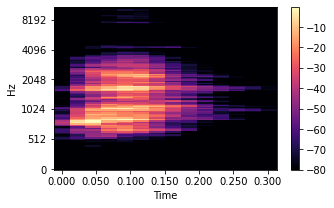

In [ ]:
x, sr = librosa.load("/content/drive/MyDrive/Urban_Sound/audio/fold5/100032-3-0-0.wav")
X=librosa.feature.melspectrogram(y = x) #stft -> Short-time Fourier transform
Xdb=librosa.amplitude_to_db(X ,ref=np.max) #Genlikten Desibel değerine
plt.figure(figsize=(5,3))
librosa.display.specshow(Xdb,sr=sr,x_axis="time",y_axis="mel")
plt.colorbar()

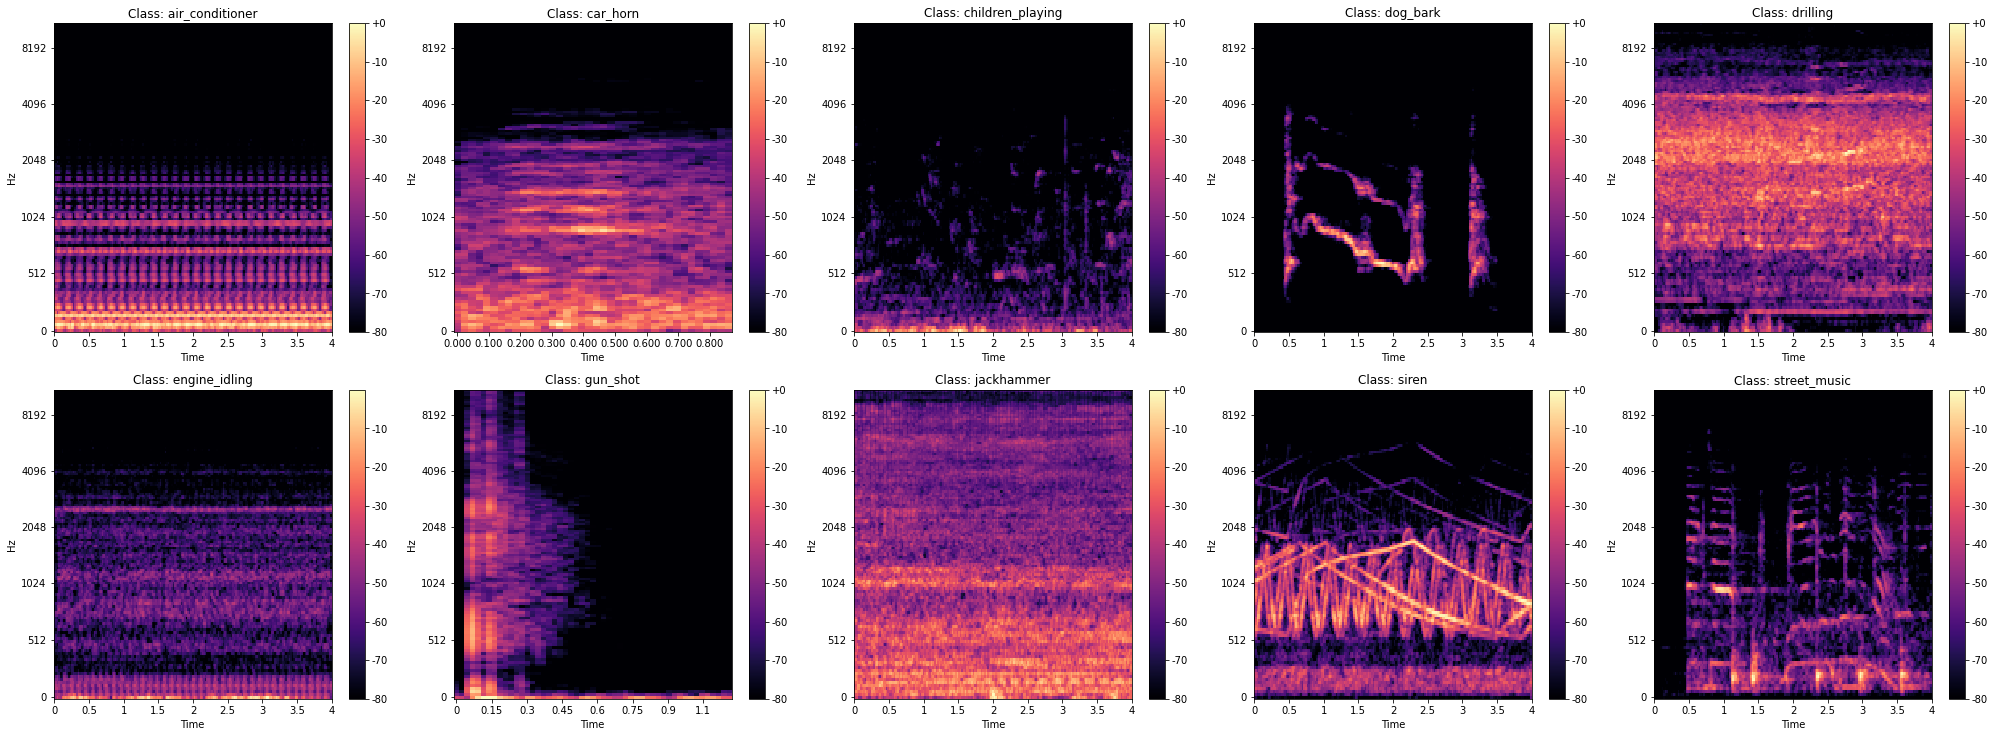

In [ ]:
fig = plt.figure(figsize=(28, 15))

for i in range(len(df_temp)):
  x, sr = librosa.load(df_temp["file_path"][i])
  mel_spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,
                                    fmax=8000)
  log_mel_spectrogram = librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
  plt.subplot(3,5,i+1)
  librosa.display.specshow(log_mel_spectrogram, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr)
  plt.colorbar(format="%+2.f")
  plt.title('Class: '+str(df_temp['class'][i]))

plt.tight_layout()